<a href="https://colab.research.google.com/github/hernandosalas/Code/blob/master/Machine%20Learning/5_Steps_to_Create_a_Basic_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The MSE for your model was 312248327184.6462 on 1104 values.


array([   1701.4587608 ,    1117.33583951,     809.30672404,
          4017.64681783,   15266.24835027,   18736.71867175,
       -122109.78010659,  -60060.06214962,  -71095.62754591,
        -11376.62743595,   -1331.40807681,   77896.90397739])

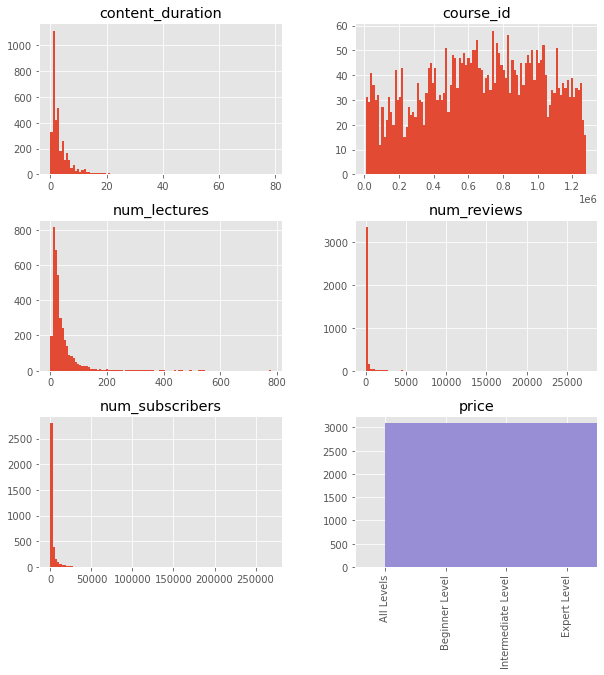

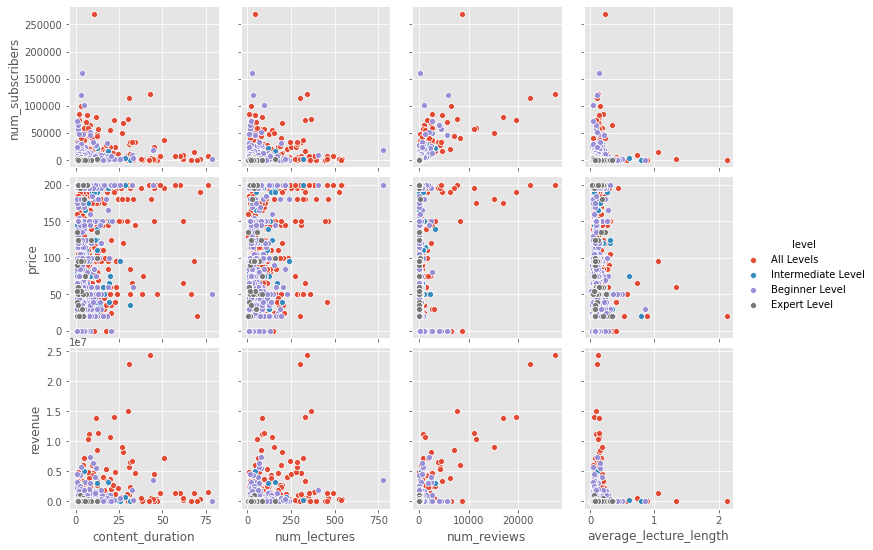

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv(r"udemy_courses.csv")

df.info()
df.head()

df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])

'''exploring data distributions'''
num_cols_df = df.select_dtypes(['int64','float64','datetime64[ns, UTC]'])
cat_cols_df = df.select_dtypes(['object'])

num_cols_df.hist(figsize = (10,10),bins=100)

(cat_cols_df['level'].value_counts()/cat_cols_df.shape[0]).plot(kind="bar")
(cat_cols_df['subject'].value_counts()/cat_cols_df.shape[0]).plot(kind="bar")

(cat_cols_df[cat_cols_df['subject']=='Business Finance']['level'].value_counts()/cat_cols_df.shape[0]).plot(kind="bar")

'''creating new features'''
num_cols_df["average_lecture_length"] = num_cols_df["content_duration"]/num_cols_df["num_lectures"]
num_cols_df["average_lecture_length"].hist(figsize=(10,10), bins = 100)
num_cols_df["average_lecture_length"].mean()

num_cols_df["revenue"] = num_cols_df["price"]*num_cols_df["num_subscribers"]
num_cols_df["revenue"].hist(figsize=(10,10), bins = 100)
num_cols_df["revenue"].mean()

'''comparing features'''
temp_df = pd.concat([num_cols_df,cat_cols_df], axis = 1)
sns.pairplot(temp_df, x_vars = ['content_duration','num_lectures','num_reviews','average_lecture_length'],y_vars = ['num_subscribers','price','revenue'], hue = 'level')

'''preprocessing'''
cat_cols_df = cat_cols_df.iloc[:,2:]

def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

cat_cols_df = create_dummy_df(cat_cols_df, cat_cols_df.columns, dummy_na = False)

from sklearn.model_selection import train_test_split

X_num_cols_df = num_cols_df[['content_duration','num_lectures','num_reviews','price']]

X = pd.concat([X_num_cols_df,cat_cols_df],axis = 1)
y = num_cols_df['revenue']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

'''running the model'''
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

from sklearn.metrics import mean_squared_error
y_test_preds = lm_model.predict(X_test)
mse_score = mean_squared_error(y_test, y_test_preds)
length_y_test = len(y_test)
print("The MSE for your model was {} on {} values.".format(mse_score, length_y_test))

lm_model.coef_